# 1 Netflix listing data, a descriptive analysis

## 1.1 Introduction: The purpose of this analysis

I've taken on this dataset as one of many planned projects intended to reinforce concepts I've gained an understanding of through extensive study of the book **Python for Data Analysis 3e**, written by Wes McKinney, the creator of pandas.

The dataset has been copied from https://www.kaggle.com/datasets/shivamb/netflix-shows, and this is the first analysis project I'll be taking on using the Python programming language. 

My goal with this analysis project is to gain some expericence in using these packages and the Python programming language that I've now read about in great detail, in order to work with data and maybe be able to use some of the information to gather meaningful insights that could in theory be used to drive business decisions for Netflix. 

I'll primarily be utilizing the packages `pandas` and `numpy` for data wrangling in this project, and `matplotlib` for visualization purposes.

### 1.1.1 Installing and importing packages

Install the necessary packages by running **`conda install pandas numpy matplotlib`** in a new cell below.

**Note:** First time installations may take a few minutes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

path = "data.csv"
dataset = pd.read_csv(path)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 1.2 Data overview

Looking at this data, there seems to be many possibilities to draw meaningful insights.

Some data I would like to investigate further and that I think could aid in producing meaningful insight are:

- Additions over time
- Looking deeper into the distribution of production countries for existing content
- Content type
- Content rating
- Content genres
- Duration
- Changes in all the above over time.

Knowing there is a fair bit of data missing, we'll have to clean our dataset before proceeding to our analysis. We also have to ensure that our data is correctly entered so that can be sure we don't have data fields that will skew any projection we'll later be making.

## 1.3 Data processing

We begin processing the data by filtering for and filling out missing values.

In [2]:
 dataset.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### 1.3.1 Filling missing values

We begin with filling in the empty rows for the `director`, `cast` and `country` columns, before investigating the `date_added`, `rating` and `duration` columns further. 

There being so few missing fields of data for these rows might indicate that something else is wrong, so let's investigate.

In [3]:
dataset.director = dataset.director.fillna("missing data")
dataset.cast = dataset.cast.fillna("missing data")
dataset.country = dataset.country.fillna("missing data")
dataset.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [4]:
dataset.iloc[np.where(dataset.date_added.isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,missing data,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,missing data,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,missing data,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,missing data,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,missing data,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,missing data,Igor Dmitriev,missing data,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,missing data,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,missing data,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,missing data,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,missing data,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


Looking over `date_added` we can tell that its values are simply missing. In addition, that the values to the right and left for it does not appear to have accidentally received its value.

We'll therefore assign these elements with the `missing value` string. before doing the same check on the final two columns.

In [5]:
dataset.date_added.iloc[np.where(dataset.date_added.isna())] = "missing data"

In [6]:
dataset.iloc[np.where(dataset.rating.isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,missing data,"Oprah Winfrey, Ava DuVernay",missing data,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,missing data,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,missing data,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [7]:
dataset.rating.iloc[np.where(dataset.rating.isna())] = "missing data"

In [8]:
dataset.iloc[np.where(dataset.duration.isna())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### 1.3.2 Fixing incorrectly input data

Looking at the missing duration data, we can quickly tell that the missing `duration` data actually exists in the `rating` column. 

To fix this, replace the missing data in these three `duration` cells with the correct data, then set the wrongful `rating` data as missing.

In [9]:
dataset.duration.iloc[np.where(dataset.duration.isna())] = \
dataset.rating.iloc[np.where(dataset.duration.isna())]

In [10]:
dataset.rating.iloc[[5541, 5794, 5813]] = "missing value"

In [11]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now that we've cleared up our data for missing values, we're ready to start analyzing our dataset. 

## 1.4 Data analysis

Beginning our analysis, we look into the `country` column to find at the frequency of productions by country.

In [12]:
dataset.country.value_counts()

United States                             2818
India                                      972
missing data                               831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

### 1.4.1 Splitting and summarizing countries by quantity

Checking for unique values, we see that there is a very large quantity of unique values, one much greater than the total number of countries. This makes it tricky to immediately assess productions by country. 

Seeing as the different countries of production are separated by commas, we'll have to split by the comma symbol, then summarize the result by the number of occurances.

In [13]:
countries_sorted = dataset.country.apply(lambda x: pd.value_counts(x.split(", "))).sum()
countries_sorted.sort_values(ascending=False)

United States     3689.0
India             1046.0
missing data       831.0
United Kingdom     804.0
Canada             445.0
                   ...  
Bermuda              1.0
Ecuador              1.0
Armenia              1.0
Mongolia             1.0
Montenegro           1.0
Length: 128, dtype: float64

Looping over our countries column with a lambda function that splits every element at the position of `, ` we can tell we've still got a few errors in our now greatly reduced number of results.

To fix this, we try reworking our lambda function, so that it first turns every **comma + space** value into just a comma, before splitting at the comma value.

In [14]:
countries_sorted = dataset.country.apply(lambda x: pd.value_counts(x.replace(", ", ",").split(","))).sum()

pd.set_option('display.max_rows', 200)
countries_sorted.sort_values(ascending=False)

United States           3690.0
India                   1046.0
missing data             831.0
United Kingdom           806.0
Canada                   445.0
France                   393.0
Japan                    318.0
Spain                    232.0
South Korea              231.0
Germany                  226.0
Mexico                   169.0
China                    162.0
Australia                160.0
Egypt                    117.0
Turkey                   113.0
Hong Kong                105.0
Nigeria                  103.0
Italy                    100.0
Brazil                    97.0
Argentina                 91.0
Belgium                   90.0
Indonesia                 90.0
Taiwan                    89.0
Philippines               83.0
Thailand                  70.0
South Africa              62.0
Colombia                  52.0
Netherlands               50.0
Denmark                   48.0
Ireland                   46.0
Sweden                    42.0
Poland                    41.0
Singapor

While we now separated all values by comma, and managed to remove commas at the end, we still have two more results to get rid of, one consisting of empty values, and one of the missing data label we gave to empty cells prior.

In [15]:
countries_sorted = countries_sorted.drop(labels=["", "missing data"])
countries_sorted.sort_values(ascending=False)

United States           3690.0
India                   1046.0
United Kingdom           806.0
Canada                   445.0
France                   393.0
Japan                    318.0
Spain                    232.0
South Korea              231.0
Germany                  226.0
Mexico                   169.0
China                    162.0
Australia                160.0
Egypt                    117.0
Turkey                   113.0
Hong Kong                105.0
Nigeria                  103.0
Italy                    100.0
Brazil                    97.0
Argentina                 91.0
Belgium                   90.0
Indonesia                 90.0
Taiwan                    89.0
Philippines               83.0
Thailand                  70.0
South Africa              62.0
Colombia                  52.0
Netherlands               50.0
Denmark                   48.0
Ireland                   46.0
Sweden                    42.0
Poland                    41.0
Singapore                 41.0
United A

With that, our `countries` column should be ready for further investigation

### 1.4.2 Visualizing productions by country

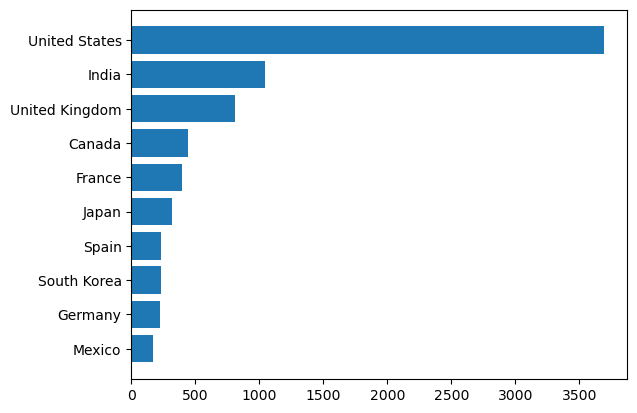

In [16]:
top_countries = countries_sorted.nlargest(n=10, keep="first")
plt.barh( top_countries.index, top_countries)
plt.gca().invert_yaxis()

In [17]:
countries_sorted.info()

<class 'pandas.core.series.Series'>
Index: 122 entries, United States to Montenegro
Series name: None
Non-Null Count  Dtype  
--------------  -----  
122 non-null    float64
dtypes: float64(1)
memory usage: 6.0+ KB


With there being as many as *122* different countries to work with, only looking at the top 10 leaves out a lot of data that could prove meaningful later.

To counteract this, we will sort our results into `bins` based on the number of productions to give a more wholesome overview of the data in its entirety.

In [18]:
freq_bins = [0, 1, 10, 100, 250, 500, 3690]
bins_text = ["1", "2-10", "11-100", "101-250", "251-500", "501+"]
bin_categories = pd.cut(countries_sorted, freq_bins, labels=bins_text)
bin_viz = pd.value_counts(bin_categories).sort_index(ascending=True)

bin_viz

1          38
2-10       32
11-100     36
101-250    10
251-500     3
501+        3
dtype: int64

With this, we can improve on our initial bar chart visualization, and blend it into a visualization of quantities by bin size, to give a better understanding of the data as a whole.

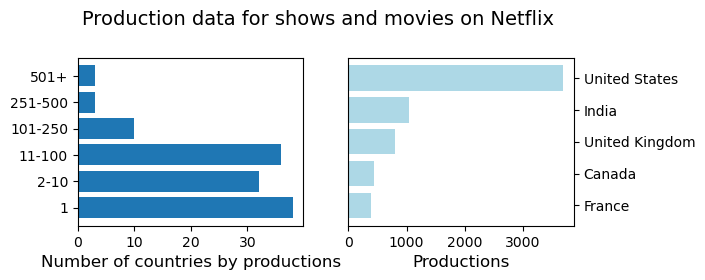

In [19]:
fig = plt.figure()
fig.suptitle("Production data for shows and movies on Netflix", fontsize="14")
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.barh(bins_text, bin_viz)
ax1.set_xlabel("Number of countries by productions", fontsize="12")

top_countries = countries_sorted.nlargest(n=5, keep="first")
ax2.barh(top_countries.index, top_countries, color="lightblue")
ax2.set_xlabel("Productions", fontsize="12")
ax2.invert_yaxis()
ax2.tick_params()
ax2.yaxis.tick_right()

plt.show()

### 1.4.3 Visualizing series and movies added over time

Next, we'll be analyzing the `year_added` column, in order to better understand Netflix's growth in content over time.

In [20]:
dataset["date_added"]

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In order to make the data easier to work with, we'll turn its format into ISO, the commonly used international standard for time and dates.

In [21]:
dataset["date_added"] = pd.to_datetime(dataset["date_added"], errors="coerce", dayfirst=True)
dataset["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [22]:
dataset["date_added"].isnull().sum()

10

Seeing as the number of missing dates only make up about 0.1% of the data, we'll omit these results from our analysis.

Next, we'll create a new column in our dataframe containing only the year which a series or movie was added to the Netflix library.

In [23]:
dataset["year_added"] = dataset["date_added"].dt.strftime('%Y')
dataset["year_added"]

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8807, dtype: object

In [24]:
year_count = dataset["year_added"].value_counts().sort_index()
year_count

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64

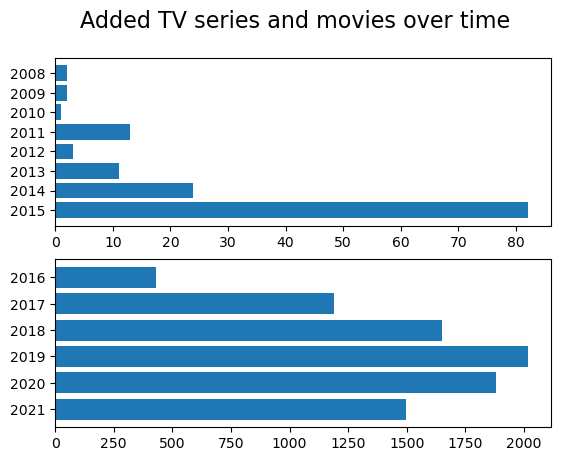

In [25]:
fig = plt.figure()
fig.suptitle("Added TV series and movies over time", fontsize="16")
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.barh(year_count.index[0:8], year_count[0:8])
ax1.invert_yaxis()


ax2.barh(year_count.index[8:14], year_count[8:14])
ax2.invert_yaxis()

plt.show()

### 1.4.4 Calculating content added by quarter

Due to there being an enormous increase and quantitative difference between the time periods 2008-2015 and 2016-2021, I've decided to map the data into two separate horizontal bar charts for better visibility.

Next we will look at releases by quarter.

In [26]:
dataset["quarter"] = pd.PeriodIndex(dataset["date_added"], freq='Q')
dataset["quarter"]

0       2021Q3
1       2021Q3
2       2021Q3
3       2021Q3
4       2021Q3
         ...  
8802    2019Q4
8803    2019Q3
8804    2019Q4
8805    2020Q1
8806    2019Q1
Name: quarter, Length: 8807, dtype: period[Q-DEC]

Discovering that the fourth quarter of 2021 is missing, we will have to make some changes to the previous visualization, as it's now incomplete. By filling in the missing quarter, we'll impute an estimate based on our available data. For simplicity, we'll utilize the `scikit-learn` package for this.

In [27]:
quarterly_sum = dataset["quarter"].value_counts().sort_index()
quarterly_sum

2008Q1      2
2009Q2      1
2009Q4      1
2010Q4      1
2011Q2      1
2011Q3      1
2011Q4     11
2012Q1      1
2012Q4      2
2013Q1      1
2013Q3      3
2013Q4      7
2014Q1      4
2014Q2      3
2014Q3      3
2014Q4     14
2015Q1     10
2015Q2     17
2015Q3     16
2015Q4     39
2016Q1     75
2016Q2     53
2016Q3    110
2016Q4    191
2017Q1    279
2017Q2    273
2017Q3    307
2017Q4    329
2018Q1    389
2018Q2    290
2018Q3    440
2018Q4    530
2019Q1    473
2019Q2    469
2019Q3    411
2019Q4    663
2020Q1    456
2020Q2    490
2020Q3    443
2020Q4    490
2021Q1    353
2021Q2    527
2021Q3    618
Freq: Q-DEC, Name: quarter, dtype: int64

To make up for all missing quarters in our result, we can pass a `date_range` then pass the value 0 to quarters without additions, and set the data type to integer. Then, we'll estimate the mean of our missing quarter.

In [28]:
quarter_range = pd.PeriodIndex(pd.date_range('2008-01-01','2020-12-31',freq = 'Q'), freq = 'Q')
quarters = quarterly_sum.reindex(quarter_range).fillna(0).astype("int64")
quarters

2008Q1      2
2008Q2      0
2008Q3      0
2008Q4      0
2009Q1      0
2009Q2      1
2009Q3      0
2009Q4      1
2010Q1      0
2010Q2      0
2010Q3      0
2010Q4      1
2011Q1      0
2011Q2      1
2011Q3      1
2011Q4     11
2012Q1      1
2012Q2      0
2012Q3      0
2012Q4      2
2013Q1      1
2013Q2      0
2013Q3      3
2013Q4      7
2014Q1      4
2014Q2      3
2014Q3      3
2014Q4     14
2015Q1     10
2015Q2     17
2015Q3     16
2015Q4     39
2016Q1     75
2016Q2     53
2016Q3    110
2016Q4    191
2017Q1    279
2017Q2    273
2017Q3    307
2017Q4    329
2018Q1    389
2018Q2    290
2018Q3    440
2018Q4    530
2019Q1    473
2019Q2    469
2019Q3    411
2019Q4    663
2020Q1    456
2020Q2    490
2020Q3    443
2020Q4    490
Freq: Q-DEC, Name: quarter, dtype: int64

In [29]:
fourth_quarter = quarters.iloc[3::4]
fourth_quarter

2008Q4      0
2009Q4      1
2010Q4      1
2011Q4     11
2012Q4      2
2013Q4      7
2014Q4     14
2015Q4     39
2016Q4    191
2017Q4    329
2018Q4    530
2019Q4    663
2020Q4    490
Freq: Q-DEC, Name: quarter, dtype: int64

In [30]:
mean_fraction = fourth_quarter.sum() / quarters.sum()
mean_fraction

0.31209754760926156

#### 1.4.4.1 Making an estimate for the missing fourth quarter

Now that we've found the mean fraction for the fourth quarter, we can render all our available data, then calculate the mean for 2021, before applying the `mean_fraction` to get an estimate for the fourth quarter.

In [31]:
quarter_range = pd.PeriodIndex(pd.date_range('2008-01-01','2021-12-31',freq = 'Q'), freq = 'Q')
quarters = quarterly_sum.reindex(quarter_range).fillna(0).astype("int64")
quarters

2008Q1      2
2008Q2      0
2008Q3      0
2008Q4      0
2009Q1      0
2009Q2      1
2009Q3      0
2009Q4      1
2010Q1      0
2010Q2      0
2010Q3      0
2010Q4      1
2011Q1      0
2011Q2      1
2011Q3      1
2011Q4     11
2012Q1      1
2012Q2      0
2012Q3      0
2012Q4      2
2013Q1      1
2013Q2      0
2013Q3      3
2013Q4      7
2014Q1      4
2014Q2      3
2014Q3      3
2014Q4     14
2015Q1     10
2015Q2     17
2015Q3     16
2015Q4     39
2016Q1     75
2016Q2     53
2016Q3    110
2016Q4    191
2017Q1    279
2017Q2    273
2017Q3    307
2017Q4    329
2018Q1    389
2018Q2    290
2018Q3    440
2018Q4    530
2019Q1    473
2019Q2    469
2019Q3    411
2019Q4    663
2020Q1    456
2020Q2    490
2020Q3    443
2020Q4    490
2021Q1    353
2021Q2    527
2021Q3    618
2021Q4      0
Freq: Q-DEC, Name: quarter, dtype: int64

In order to estimate the unknown quarter, knowing the average of our known fourth quarters equals **31.2%** of the sum for that particular year, we'll write a simple function that allows us to easily test our way to the most correct estimate, given what we know.

In [32]:
known = quarters.loc[["2021Q1", "2021Q2", "2021Q3"]].sum()
unknown = None

sim = lambda x: x / (known + x)

In [33]:
result = sim(680)
result

0.3122130394857668

We then calculate the percentage difference between `mean_fraction`, the average Q4 value in percentage when compared to the rest of the year, to the simulated estimate. By testing different values, we'll find that 680 is the most accurate estimate for the fourth quarter of 2021.

$$ \dfrac{|V_1-V_2|}{\left[\dfrac{(V_1+V_2)}{2}\right]}\times100 $$

In [34]:
diff = (result - mean_fraction) / ((result + mean_fraction) / 2) * 100
print("%f" % diff)

0.036998


With a percentage difference of just **0.036998%** from the average of 31.2%, 680 should be the most accurate estimate for the number of releases in the fourth quarter of 2021.

In [35]:
quarters.loc["2021Q4"] = 680

### 1.4.5 Visualizing additions by quarter

Now that we've filled in the missing quarter, we can visualize releases based on quarter.

In [36]:
q1, q2, q3, q4 = quarters.iloc[0::4].sum(), quarters.iloc[1::4].sum(), quarters.iloc[2::4].sum(), quarters.iloc[3::4].sum()

In [37]:
quarter_summary = {"q1": q1, "q2": q2, "q3": q3, "q4": q4}
releases_by_quarter = pd.Series(quarter_summary, index = ["q1", "q2", "q3", "q4"])

In [38]:
releases_by_quarter

q1    2043
q2    2124
q3    2352
q4    2958
dtype: int64

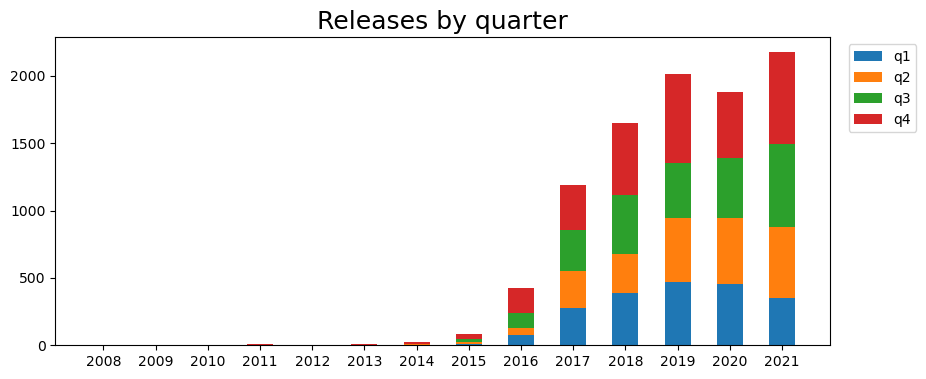

In [39]:
year_range = year_count.index
weight_counts = {"q1": quarters.iloc[0::4].values, "q2": quarters.iloc[1::4].values, "q3": quarters.iloc[2::4].values, "q4": quarters.iloc[3::4].values}
width = 0.5

fig, ax = plt.subplots(figsize=(10, 4))
bottom = np.zeros(14)


for boolean, weight_count in weight_counts.items():
    p = ax.bar(year_range, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Releases by quarter", fontsize=18)
ax.legend(loc="upper right", bbox_to_anchor = (1.12, 1))

plt.show()

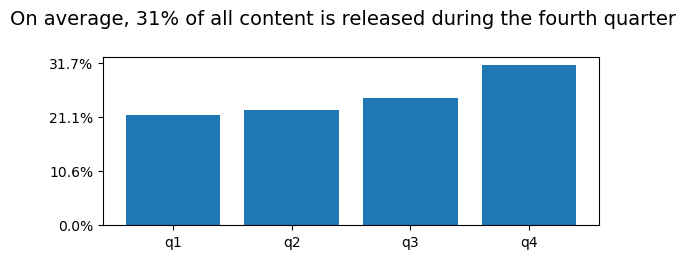

In [40]:
from matplotlib.ticker import PercentFormatter

fig = plt.figure()
fig.suptitle("On average, 31% of all content is released during the fourth quarter", fontsize="14")
ax1 = fig.add_subplot(2, 1, 1)

ax1.bar(releases_by_quarter.index, releases_by_quarter)
ax1.yaxis.set_major_formatter(PercentFormatter(releases_by_quarter.sum())) 

plt.show()

### 1.4.6 Formatting the genres column for analysis

In [41]:
genre_sorted = dataset.listed_in.apply(lambda x: pd.value_counts(x.split(", "))).sum()
genre_sorted.sort_values(ascending=False)

International Movies            2752.0
Dramas                          2427.0
Comedies                        1674.0
International TV Shows          1351.0
Documentaries                    869.0
Action & Adventure               859.0
TV Dramas                        763.0
Independent Movies               756.0
Children & Family Movies         641.0
Romantic Movies                  616.0
TV Comedies                      581.0
Thrillers                        577.0
Crime TV Shows                   470.0
Kids' TV                         451.0
Docuseries                       395.0
Music & Musicals                 375.0
Romantic TV Shows                370.0
Horror Movies                    357.0
Stand-Up Comedy                  343.0
Reality TV                       255.0
British TV Shows                 253.0
Sci-Fi & Fantasy                 243.0
Sports Movies                    219.0
Anime Series                     176.0
Spanish-Language TV Shows        174.0
TV Action & Adventure    

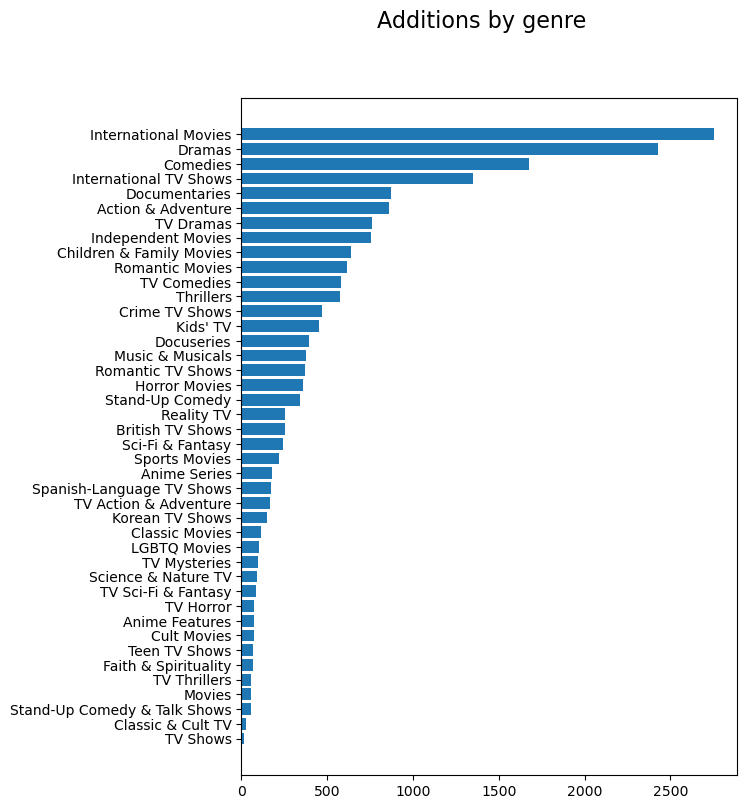

In [46]:
fig = plt.figure(figsize=[6.4, 8.8])
fig.suptitle("Additions by genre", fontsize="16")
ax1 = fig.add_subplot(1, 1, 1)


ax1.barh(genre_sorted.sort_values(ascending=False).index, genre_sorted.sort_values(ascending=False))
ax1.invert_yaxis()

By looking over the different genres we have to work with, we can easily tell that a lot of them that has TV in front of them, are really just duplicate genres. For example, we can already tell if a comedy is a TV comedy or a movie by looking into the `type` column.

Given this, we can greatly shorten the list of genres by merging together duplicate types that in reality mean the same thing.

In [43]:
genre_reduced = genre_sorted.astype("int64")

genre_reduced = genre_reduced.rename(index={"Horror Movies": "Horror"})

genre_reduced["Thrillers"] += genre_reduced["TV Thrillers"]
genre_reduced["Horror"] += genre_reduced["TV Horror"]
genre_reduced["Dramas"] += genre_reduced["TV Dramas"]
genre_reduced["Comedies"] += genre_reduced["TV Comedies"]
genre_reduced["Documentaries"] += genre_reduced["Docuseries"]
genre_reduced["Action & Adventure"] += genre_reduced["TV Action & Adventure"]
genre_reduced["Romantic Movies"] += genre_reduced["Romantic TV Shows"]
genre_reduced["Sci-Fi & Fantasy"] += genre_reduced["TV Sci-Fi & Fantasy"]
genre_reduced["Anime Series"] += genre_reduced["Anime Features"]
genre_reduced["Classic & Cult TV"] += genre_reduced["Cult Movies"] + genre_reduced["Classic Movies"]

genre_reduced = genre_reduced.rename(index={"Romantic Movies": "Romance"})
genre_reduced = genre_reduced.rename(index={"Anime Series": "Anime"})
genre_reduced = genre_reduced.rename(index={"Classic & Cult TV": "Classic & Cult"})

genre_reduced = genre_reduced.drop(labels=["TV Thrillers", "TV Horror", "TV Dramas", "TV Comedies", "Docuseries", "TV Action & Adventure", "Romantic TV Shows", "TV Sci-Fi & Fantasy", "Anime Features", "Cult Movies", "Classic Movies", "TV Shows", "Movies"])

In [44]:
genre_reduced.sort_values(ascending=False)

Dramas                          3190
International Movies            2752
Comedies                        2255
International TV Shows          1351
Documentaries                   1264
Action & Adventure              1027
Romance                          986
Independent Movies               756
Children & Family Movies         641
Thrillers                        634
Crime TV Shows                   470
Kids' TV                         451
Horror                           432
Music & Musicals                 375
Stand-Up Comedy                  343
Sci-Fi & Fantasy                 327
Reality TV                       255
British TV Shows                 253
Anime                            247
Sports Movies                    219
Classic & Cult                   215
Spanish-Language TV Shows        174
Korean TV Shows                  151
LGBTQ Movies                     102
TV Mysteries                      98
Science & Nature TV               92
Teen TV Shows                     69
F

With this, we've now summarized the totals for redundant genres, renamed a few for clarity and dropped 13 genres, 11 of which were redundant and 2 (TV Shows and Movies) that does not provide a genre at all.

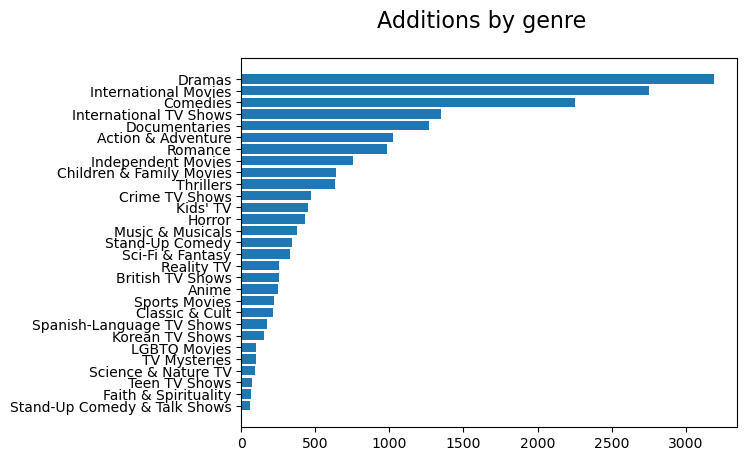

In [49]:
fig = plt.figure()
fig.suptitle("Additions by genre", fontsize="16")
ax1 = fig.add_subplot(1, 1, 1)

ax1.barh(genre_reduced.sort_values(ascending=False).index, genre_reduced.sort_values(ascending=False))
ax1.invert_yaxis()

## 1.5 Conclusion

While I did not dig deep enough into this dataset to derive insights from it that can guide business decisions, I am left with a better understanding of working with data in Python, and to accomplish visualizations that are designed to be easy to understand.

For future projects I need to spend significantly more time processing the data, so that I don't have to continuously process data throughout the analysis phase. This could save significant amounts of time.

The most time consuming and difficult part of writing this notebook has by far been working with matplotlib. Even though this package allows great freedom in what you can and cannot do, I often find it to be quite unintuitive and unneccesarily difficult to work with, for the simple things I'm trying to visualize with it. For future projects, I'll most likely choose another visualization package that is more straightforward.